### AUTHOR : AAESHA AZEEMUDDIN

### GRIP @ The Sparks Foundation
### Task 2: Prediction using Unsupervised Machine Learning

###  K-means clustering

### Importing Libraries

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### LOADING THE DATA

In [2]:
data = pd. read_csv("https://raw.githubusercontent.com/Anuksha-Dutta/GRIP_INTERNSHIP_Task2/main/Data.csv")
print ("Data loaded successfully")
data. head ()

Data loaded successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.shape

(150, 6)

We need to find the best value of k for k-means classification using the elbow method and within-cluster sum of squares (WSS). I'll create a scatter plot of the dataset to understand its distribution.

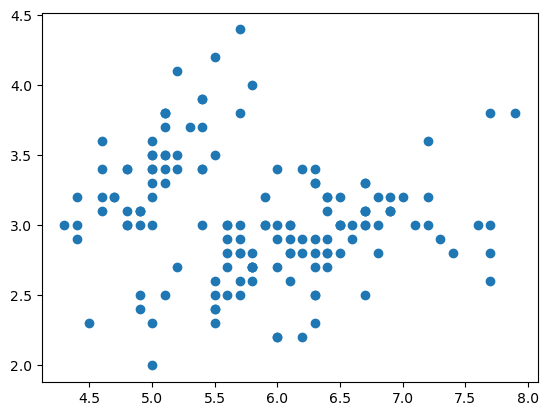

In [5]:
plt.scatter(data ['SepalLengthCm'] ,data ['SepalWidthCm' ])

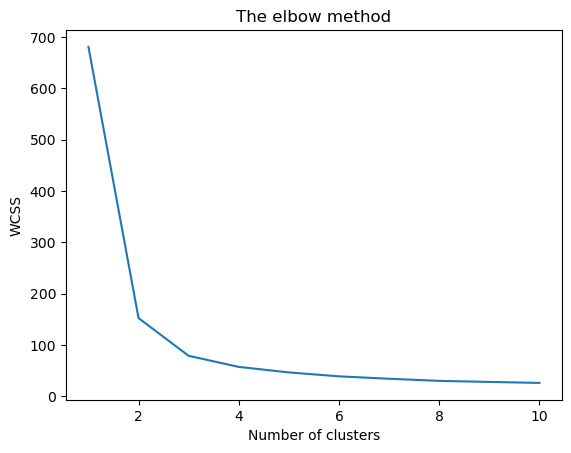

In [6]:
x = data.iloc[:, [1, 2, 3,4]]. values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans. fit (x)
    wcss.append(kmeans.inertia_)
    # Plotting the results onto a line graph,
# 'allowing us to observe "The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt. show()

The graph shows an elbow shape, indicating that the optimal number of clusters is 3. This aligns with our dataset containing 3 species of iris flowers.

In [7]:
# Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                                   max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [8]:
#Predictions of our model
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### VISUALISING THE CLUSTERS

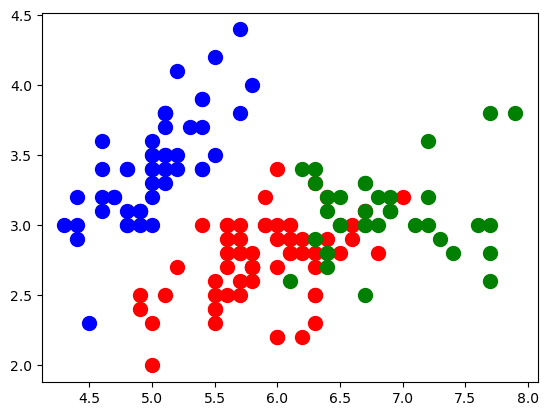

In [9]:
#Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans ==0, 1],
                         s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans ==1, 1],
                         s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans ==2, 1],
                         s = 100, c = 'green', label = 'Iris-virginica')


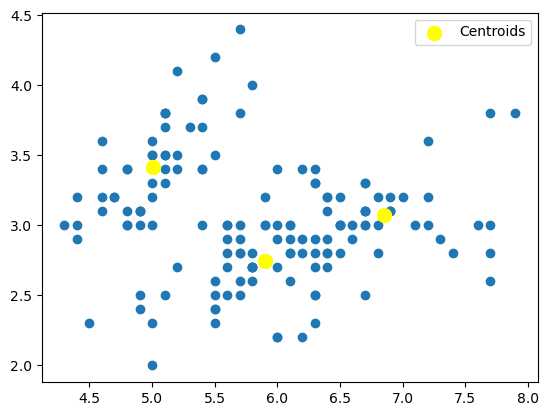

In [17]:
#Plotting the centroids of the clusters
plt. scatter (data['SepalLengthCm'], data['SepalWidthCm' ] )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
s = 100, c = 'yellow', label = 'Centroids')
plt. legend ()

### FINAL RESULT VISUALIZING TOGETHER

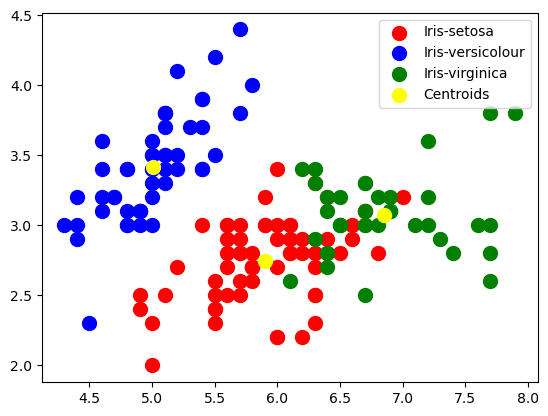

In [10]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
             s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
             s = 100, c ='blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
             s = 100, c ='green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter (kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
s = 100, c = 'yellow', label = 'Centroids')
plt. legend ()

# This concludes K-Means